<a href="https://colab.research.google.com/github/AndresChavez123/Sys2025-2/blob/main/Parcial1_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

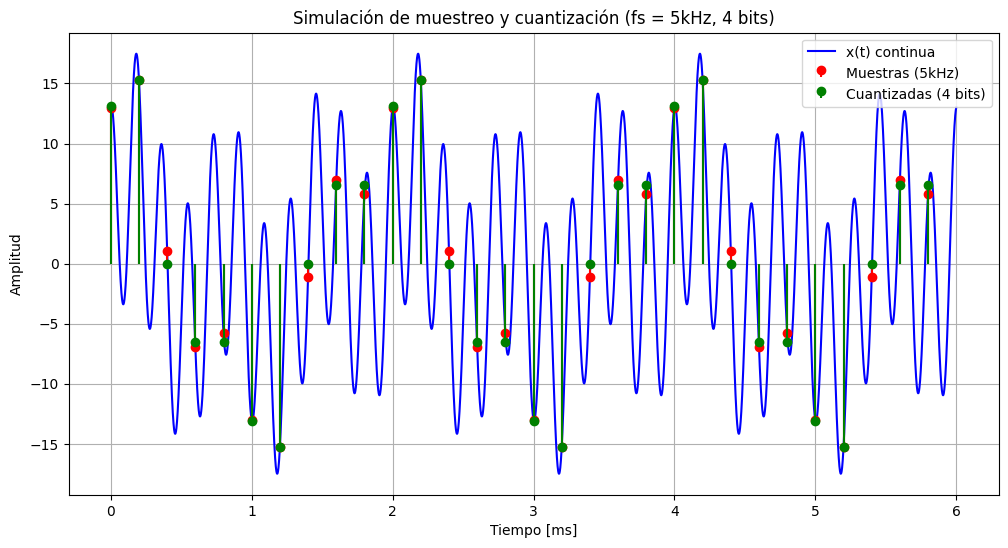

Frecuencia máxima de la señal: 5500 Hz
Frecuencia de Nyquist: 11000 Hz
Frecuencia de muestreo usada: 5000 Hz

⚠️ Muestreo NO adecuado: se produce aliasing.
✔️ Una frecuencia de muestreo mínima recomendable sería fs = 13750 Hz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
f1 = 500      # Hz -> (1000π rad/s)
f2 = 1500     # Hz -> (3000π rad/s)
f3 = 5500     # Hz -> (11000π rad/s)
A1, A2, A3 = 3, 5, 10

# Señal analógica continua
def x_t(t):
    return A1*np.cos(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)

# Frecuencia de muestreo del ADC
fs = 5000  # Hz
Ts = 1/fs

# Frecuencia máxima de la señal
fmax = max(f1, f2, f3)

# Tiempo de simulación (3 periodos de la frecuencia más baja)
Tmin = 1/f1
t_cont = np.linspace(0, 3*Tmin, 10000)
x_cont = x_t(t_cont)

# Muestras discretas
t_disc = np.arange(0, 3*Tmin, Ts)
x_disc = x_t(t_disc)

# Cuantización (4 bits)
n_bits = 4
N_levels = 2**n_bits
x_max = np.max(np.abs(x_cont))
Delta = 2*x_max / N_levels  # paso de cuantización

# Cuantización uniforme
xq = np.round(x_disc / Delta) * Delta
xq = np.clip(xq, -x_max, x_max - Delta)

# Reconstrucción (sólo visual)
t_recons = np.linspace(0, 3*Tmin, 1000)
x_recons = np.interp(t_recons, t_disc, xq)

# --- GRÁFICAS ---
plt.figure(figsize=(12, 6))

plt.plot(t_cont*1000, x_cont, 'b', label='x(t) continua')
plt.stem(t_disc*1000, x_disc, linefmt='r-', markerfmt='ro', basefmt=' ', label='Muestras (5kHz)')
plt.stem(t_disc*1000, xq, linefmt='g-', markerfmt='go', basefmt=' ', label='Cuantizadas (4 bits)')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Simulación de muestreo y cuantización (fs = 5kHz, 4 bits)')
plt.legend()
plt.grid(True)
plt.show()

# --- Análisis de adecuación del muestreo ---
print(f"Frecuencia máxima de la señal: {fmax:.0f} Hz")
print(f"Frecuencia de Nyquist: {2*fmax:.0f} Hz")
print(f"Frecuencia de muestreo usada: {fs:.0f} Hz")

if fs < 2*fmax:
    print("\n⚠️ Muestreo NO adecuado: se produce aliasing.")
    fs_new = 2.5 * fmax
    print(f"✔️ Una frecuencia de muestreo mínima recomendable sería fs = {fs_new:.0f} Hz")
else:
    print("\n✅ Muestreo adecuado según el teorema de Nyquist.")


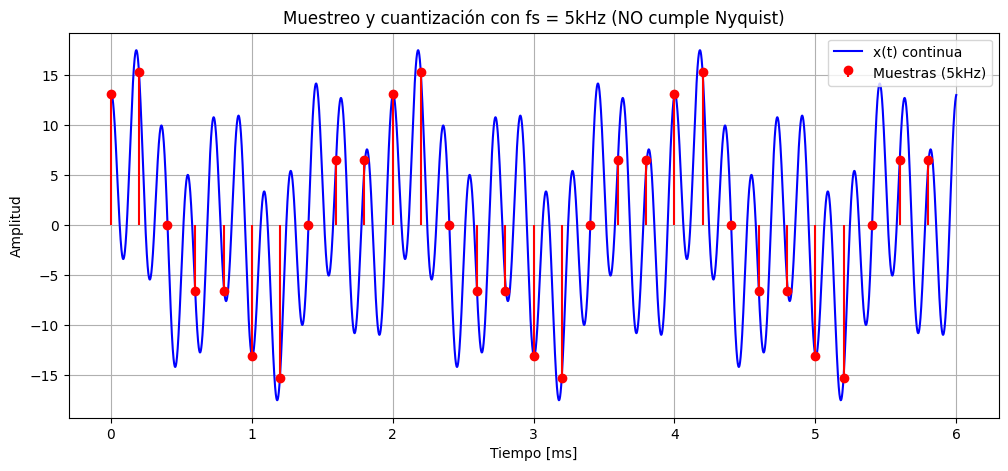

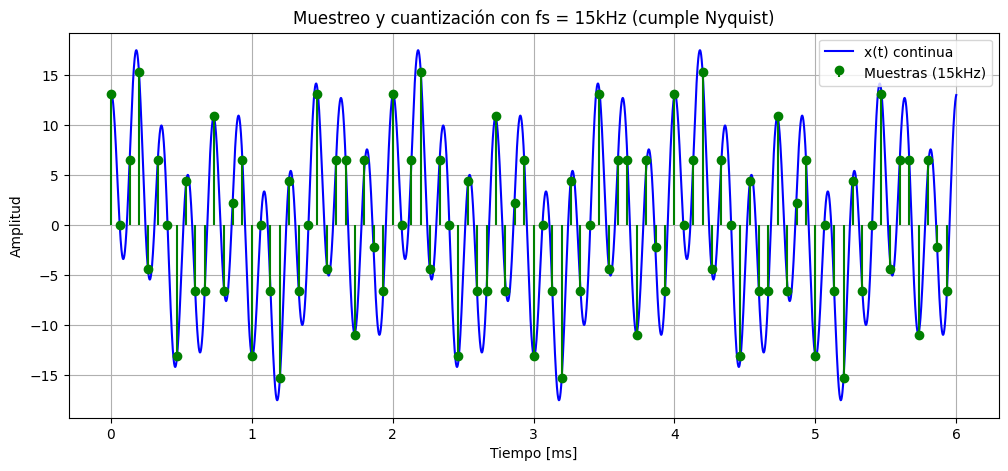

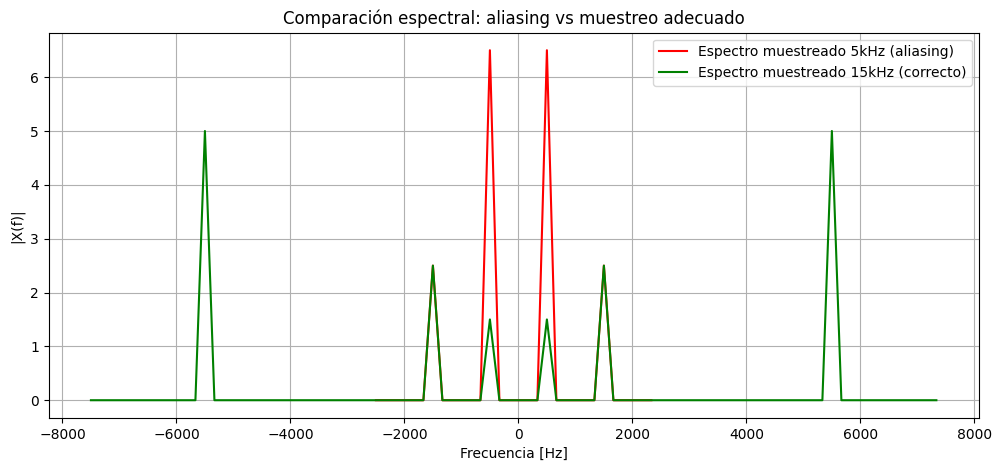

=== ANÁLISIS DE MUESTREO ===
Frecuencia máxima de la señal: 5500 Hz
Frecuencia de Nyquist mínima: 11000 Hz
fs usado (1): 5000 Hz  -> NO cumple Nyquist ❌
fs usado (2): 15000 Hz  -> Cumple Nyquist ✅

=== PARÁMETROS DE CUANTIZACIÓN ===
Niveles de cuantización: 16
Amplitud máxima: 17.48
Paso de cuantización Δ = 2.1848
Error máximo ±Δ/2 = 1.0924


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===========================================================
#  BLOQUE 1: DEFINICIÓN DE LA SEÑAL CONTINUA x(t)
# ===========================================================
# Señal continua: x(t) = 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)
# Recordemos que ω = 2πf, por tanto:
#   1000π rad/s -> f = 500 Hz
#   3000π rad/s -> f = 1500 Hz
#   11000π rad/s -> f = 5500 Hz

f1 = 500      # Hz -> (1000π rad/s)
f2 = 1500     # Hz -> (3000π rad/s)
f3 = 5500     # Hz -> (11000π rad/s)
A1, A2, A3 = 3, 5, 10   # Amplitudes de cada componente

def x_t(t):
    """Señal continua original"""
    return A1*np.cos(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)


# ===========================================================
#  BLOQUE 2: FUNCIÓN PARA MUESTREAR Y CUANTIZAR
# ===========================================================
# Esta función simula el proceso de conversión A/D:
# 1. Muestreo: toma valores de x(t) cada Ts = 1/fs segundos.
# 2. Cuantización: redondea cada muestra al nivel más cercano.
# Se usa cuantización uniforme con 4 bits (16 niveles).

def muestrear_y_cuantizar(fs, n_bits=4):
    Ts = 1/fs                     # Período de muestreo
    Tmin = 1/f1                   # Usamos 3 periodos de la frecuencia más baja
    t_cont = np.linspace(0, 3*Tmin, 10000)  # Tiempo continuo denso
    x_cont = x_t(t_cont)
    t_disc = np.arange(0, 3*Tmin, Ts)       # Tiempo discreto (muestras)
    x_disc = x_t(t_disc)

    # ---------------------------
    # Cuantización uniforme
    # ---------------------------
    N_levels = 2**n_bits          # Número de niveles = 16
    x_max = np.max(np.abs(x_cont))# Amplitud máxima de la señal
    Delta = 2*x_max / N_levels    # Paso de cuantización Δ
    # Cuantizamos redondeando al múltiplo más cercano de Δ
    xq = np.round(x_disc / Delta) * Delta
    # Limitamos los valores al rango permitido
    xq = np.clip(xq, -x_max, x_max - Delta)

    return t_cont, x_cont, t_disc, x_disc, xq, Delta, x_max


# ===========================================================
#  BLOQUE 3: SIMULACIÓN 1 → fs = 5 kHz (NO cumple Nyquist)
# ===========================================================
# La frecuencia máxima de la señal es 5500 Hz → se necesita fs >= 11000 Hz.
# Como fs=5kHz < 2*fmax, ocurrirá aliasing (superposición espectral).

fs1 = 5000
t_cont, x_cont, t_disc, x_disc, xq, Delta, x_max = muestrear_y_cuantizar(fs1)

plt.figure(figsize=(12,5))
plt.plot(t_cont*1000, x_cont, 'b', label='x(t) continua')
plt.stem(t_disc*1000, xq, linefmt='r-', markerfmt='ro', basefmt=' ', label='Muestras (5kHz)')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Muestreo y cuantización con fs = 5kHz (NO cumple Nyquist)')
plt.legend()
plt.grid()
plt.show()


# ===========================================================
#  BLOQUE 4: SIMULACIÓN 2 → fs = 15 kHz (ADECUADO)
# ===========================================================
# Ahora fs=15kHz > 2*fmax = 11000Hz → Cumple el teorema de Nyquist.
# No hay aliasing y las muestras representan bien la señal original.

fs2 = 15000
t_cont2, x_cont2, t_disc2, x_disc2, xq2, _, _ = muestrear_y_cuantizar(fs2)

plt.figure(figsize=(12,5))
plt.plot(t_cont2*1000, x_cont2, 'b', label='x(t) continua')
plt.stem(t_disc2*1000, xq2, linefmt='g-', markerfmt='go', basefmt=' ', label='Muestras (15kHz)')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Muestreo y cuantización con fs = 15kHz (cumple Nyquist)')
plt.legend()
plt.grid()
plt.show()


# ===========================================================
#  BLOQUE 5: ANÁLISIS ESPECTRAL (FFT)
# ===========================================================
# Se calcula el espectro de las señales muestreadas para visualizar aliasing.
# fftshift se usa para centrar el eje de frecuencia en 0 Hz.

def espectro_fft(x, fs):
    N = len(x)
    X = np.fft.fftshift(np.fft.fft(x))
    f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
    return f, np.abs(X)/N

# FFT para ambas señales
f1_fft, X1 = espectro_fft(x_disc, fs1)
f2_fft, X2 = espectro_fft(x_disc2, fs2)

plt.figure(figsize=(12,5))
plt.plot(f1_fft, X1, 'r', label='Espectro muestreado 5kHz (aliasing)')
plt.plot(f2_fft, X2, 'g', label='Espectro muestreado 15kHz (correcto)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Comparación espectral: aliasing vs muestreo adecuado')
plt.legend()
plt.grid()
plt.show()


# ===========================================================
#  BLOQUE 6: RESULTADOS Y CONCLUSIONES
# ===========================================================
# Se imprimen parámetros del sistema y del proceso de cuantización.

print("=== ANÁLISIS DE MUESTREO ===")
print(f"Frecuencia máxima de la señal: {f3} Hz")
print(f"Frecuencia de Nyquist mínima: {2*f3} Hz")
print(f"fs usado (1): {fs1} Hz  -> NO cumple Nyquist ❌")
print(f"fs usado (2): {fs2} Hz  -> Cumple Nyquist ✅")

print("\n=== PARÁMETROS DE CUANTIZACIÓN ===")
print(f"Niveles de cuantización: {2**4}")
print(f"Amplitud máxima: {x_max:.2f}")
print(f"Paso de cuantización Δ = {Delta:.4f}")
print(f"Error máximo ±Δ/2 = {Delta/2:.4f}")


# ===========================================================
#  BLOQUE 7: CONCLUSIÓN TEÓRICA
# ===========================================================
# El ADC de 5 kHz y 4 bits no es adecuado, ya que fs < 2*fmax → produce aliasing severo.
# El conversor rediseñado con fs = 15 kHz elimina aliasing y representa correctamente la señal.
# La cuantización de 4 bits introduce un error máximo de ±Δ/2, visible como ligeros niveles escalonados.
# En la práctica, se recomienda filtro antialias antes del ADC y un mayor número de bits para mejorar resolución.


Conclusión

El conversor ADC de frecuencia de muestreo $f_s = 5\,\text{kHz}$ y resolución de $4$ bits no es adecuado, ya que
$f_s < 2f_{\text{max}}$, lo cual produce aliasing severo.

El conversor rediseñado con una frecuencia de muestreo $f_s = 15\,\text{kHz}$ elimina el aliasing y permite representar correctamente la señal original.

La cuantización de $4$ bits introduce un error máximo de $\pm \Delta / 2$, observable como ligeros niveles escalonados en la señal cuantizada.

En la práctica, se recomienda el uso de un \textit{filtro antialias} previo al ADC y un mayor número de bits para mejorar la resolución del sistema.
